### K-Means Clustering Algorithm

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define global figure properties
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

In [11]:
# K-Means algorithm

# Set the random seed for reproducibility
np.random.seed(45)

# The data points
X = np.array([[3, 3.5], [2.3, 3], [2, 4], [7, 7], [6.5, 7.5], [7, 8]])
X

array([[3. , 3.5],
       [2.3, 3. ],
       [2. , 4. ],
       [7. , 7. ],
       [6.5, 7.5],
       [7. , 8. ]])

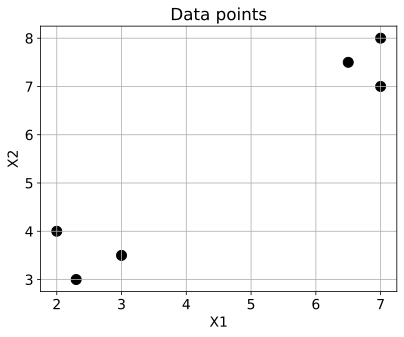

In [12]:
# Plot the data points
plt.scatter(X[:,0], X[:,1], s=100, c='black')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data points')
plt.grid()
plt.show()

In [13]:
# 1) Initialize k centroids
k = 2

ridx = np.random.choice(X.shape[0], k, replace=False)
centroids = X[ridx,:]

centroids

array([[2. , 4. ],
       [2.3, 3. ]])

In [14]:
# 2) Compute the Euclidean distance
distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
distances

array([[1.11803399, 1.04403065, 0.        , 5.83095189, 5.70087713,
        6.40312424],
       [0.86023253, 0.        , 1.04403065, 6.17170965, 6.15548536,
        6.86221539]])

In [15]:
# 3) Assign each data observation to the group with the closest centroid
labels = np.argmin(distances, axis=0)
labels

array([1, 1, 0, 0, 0, 0])

In [16]:
# 4) Update each centroid
for i in range(k):
    centroids[i] = X[labels == i].mean(axis=0)

centroids

array([[5.625, 6.625],
       [2.65 , 3.25 ]])

In [17]:
# 5) Repeat steps 2-4 until the centroids do not change
max_iter = 300
for _ in range(max_iter):
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    labels = np.argmin(distances, axis=0)
    
    for i in range(k):
        centroids[i] = X[labels == i].mean(axis=0)

centroids

array([[6.83333333, 7.5       ],
       [2.43333333, 3.5       ]])

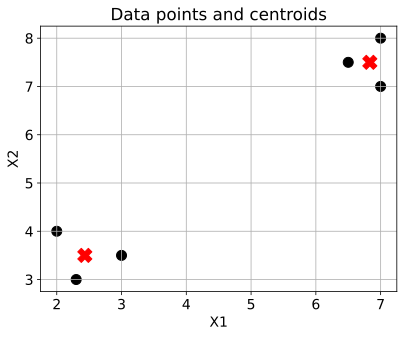

In [18]:
# Plot the data points and the centroids
plt.scatter(X[:,0], X[:,1], s=100, c='black')
plt.scatter(centroids[:,0], centroids[:,1], s=200, c='red', marker='X')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data points and centroids')
plt.grid()
plt.show()